## First Task 
## Linear Regression Model for House Price Prediction

### Introduction
This notebook demonstrates the implementation of a linear regression model to predict house prices based on square footage, number of bedrooms, and number of bathrooms.

### Libraries Used
- numpy: for numerical operations
- pandas: for data manipulation
- scikit-learn: for machine learning models
- matplotlib: for data visualization

### Data
For this example, we will use a synthetic dataset containing information about house prices, square footage, number of bedrooms, and number of bathrooms.

### Importing Libraries
```python
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Importing The Library 

In [1]:
#Data Visualization
#========================================================================================
import matplotlib.pyplot as plt 
import seaborn as sns 

#Data Manipulation 
#========================================================================================
import numpy as np 
import pandas as pd 

#Model 
#========================================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#Data Preprocessing
#========================================================================================
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

#Metrics 
#========================================================================================
from sklearn.metrics import mean_squared_error,r2_score

#Model Export  
#========================================================================================
import pickle

#Model Tunung  
#========================================================================================
from sklearn.model_selection import GridSearchCV
#Warnings
#========================================================================================
import warnings
warnings.filterwarnings('ignore')

## Read The Data

In [2]:
House_price=pd.read_csv('E:/My_Project/Prodigy InfoTech/Task 1/DataSet/train.csv')

In [3]:
House_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Choose The Selected Columns For Analysis  

In [4]:
df=House_price[['LotArea','GarageArea','TotalBsmtSF','GrLivArea', 'BedroomAbvGr', 'FullBath','HalfBath','SalePrice']]

In [5]:
df.head()

,LotArea,GarageArea,TotalBsmtSF,GrLivArea,BedroomAbvGr,FullBath,HalfBath,SalePrice
0,8450,548,856,1710,3,2,1,208500
1,9600,460,1262,1262,3,2,0,181500
2,11250,608,920,1786,3,2,1,223500
3,9550,642,756,1717,3,1,0,140000
4,14260,836,1145,2198,4,2,1,250000


## EDA

In [6]:
df.describe()

,LotArea,GarageArea,TotalBsmtSF,GrLivArea,BedroomAbvGr,FullBath,HalfBath,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,472.980137,1057.429452,1515.463699,2.866438,1.565068,0.382877,180921.195890
std,9981.264932,213.804841,438.705324,525.480383,0.815778,0.550916,0.502885,79442.502883
min,1300.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,334.500000,795.750000,1129.500000,2.000000,1.000000,0.000000,129975.000000
50%,9478.500000,480.000000,991.500000,1464.000000,3.000000,2.000000,0.000000,163000.000000
75%,11601.500000,576.000000,1298.250000,1776.750000,3.000000,2.000000,1.000000,214000.000000
max,215245.000000,1418.000000,6110.000000,5642.000000,8.000000,3.000000,2.000000,755000.000000


In [7]:
df.isna().sum()

LotArea         0
GarageArea      0
TotalBsmtSF     0
GrLivArea       0
BedroomAbvGr    0
FullBath        0
HalfBath        0
SalePrice       0
dtype: int64

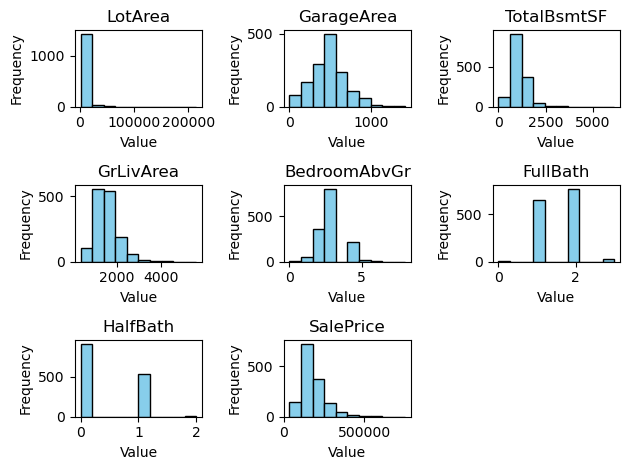

In [8]:
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    plt.hist(df[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

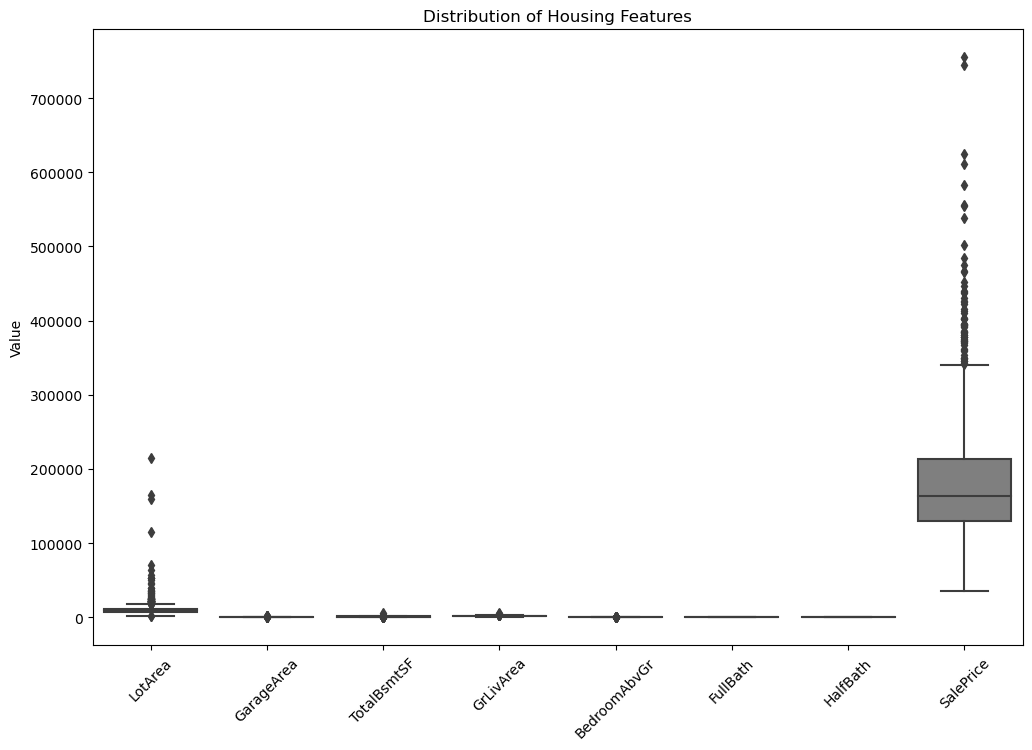

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Distribution of Housing Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

## I Have A very Large prices it will effect the model performance 
solutions are :
 remove the outliers 

## Remove the outliers 


In [10]:
def iqr_method(df):
    perc_75 = np.percentile(df, 75)
    perc_25 = np.percentile(df, 25)
    iqr_range = perc_75 - perc_25
    iqr_upper = perc_75 + 1.5 * iqr_range
    iqr_lower = perc_25 - 1.5 * iqr_range
    return(iqr_lower,iqr_upper)

In [11]:
lower,upper=iqr_method(df['SalePrice'])
print('upper limit for price   = ', upper )
print('lower limit for price   = ', lower)
df=df[(df['SalePrice']>lower)&(df['SalePrice']<upper)]

upper limit for price   =  340037.5
lower limit for price   =  3937.5


In [12]:
def remove_outliers(df, threshold=3):
    cols = ['LotArea','GarageArea','TotalBsmtSF','GrLivArea', 'BedroomAbvGr', 'FullBath','HalfBath']
    df_clean = df.copy()  
            # initialize a new dataframe to avoid modifying the original
    for col in cols:
        zscore = (df_clean[col] - df_clean[col].mean()) / df_clean[col].std()
        df_clean = df_clean[abs(zscore) <= threshold]
    return df_clean

In [13]:
df=remove_outliers(df)

In [14]:
df.to_csv('house_price_1.csv')

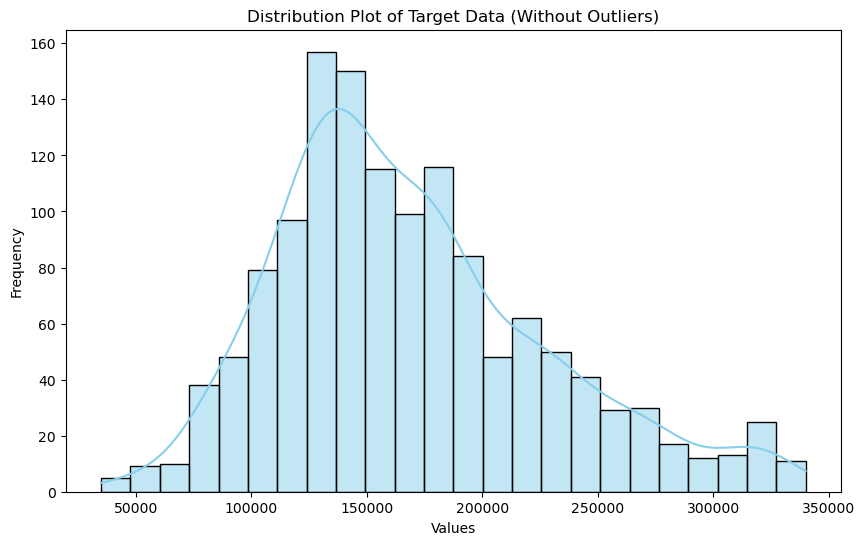

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, color='skyblue')
plt.title('Distribution Plot of Target Data (Without Outliers)')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

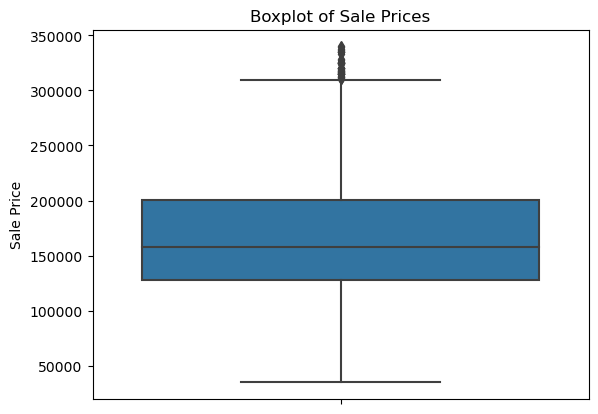

In [16]:
sns.boxplot(y=df['SalePrice'])
plt.title('Boxplot of Sale Prices')
plt.ylabel('Sale Price')
plt.show()

In [17]:
df.head()

,LotArea,GarageArea,TotalBsmtSF,GrLivArea,BedroomAbvGr,FullBath,HalfBath,SalePrice
0,8450,548,856,1710,3,2,1,208500
1,9600,460,1262,1262,3,2,0,181500
2,11250,608,920,1786,3,2,1,223500
3,9550,642,756,1717,3,1,0,140000
4,14260,836,1145,2198,4,2,1,250000


## Split the Data 

In [18]:
X=df.drop(columns=['SalePrice'])
y=df['SalePrice']

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

# Modeling 

In [20]:
def linearregression(X_train, X_test, y_train, y_test):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    r2 = r2_score(y_test, y_pred_lr)
    rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
    print('R^2:', r2.round(3))
    print('RMSE:', rmse.round(2))


    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_lr, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted (Linear Regression Regression)')
    plt.grid(True)
    plt.show()
    return (r2,rmse)

In [21]:
def lasso(X_train, X_test, y_train, y_test):
    lasso = Lasso()
    lasso.fit(X_train,y_train)
    y_pred_lasso=lasso.predict(X_test)
    r2=r2_score(y_test, y_pred_lasso)
    rmse= mean_squared_error(y_test, y_pred_lasso, squared = False) 
    print('R^2:', r2.round(3) )
    print('RMSE:',rmse.round(2))

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_lasso, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted (Lasso Regression)')
    plt.grid(True)
    plt.show()
    
    return (r2,rmse)

In [22]:
def ridge(X_train, X_test, y_train, y_test, alpha=1.0):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    r2 = r2_score(y_test, y_pred_ridge)
    rmse = mean_squared_error(y_test, y_pred_ridge, squared=False) 
    print('R^2:', r2.round(3))
    print('RMSE:', rmse.round(2))

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_ridge, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted (Ridge Regression)')
    plt.grid(True)
    plt.show()
    
    return r2, rmse

R^2: 0.714
RMSE: 32472.72


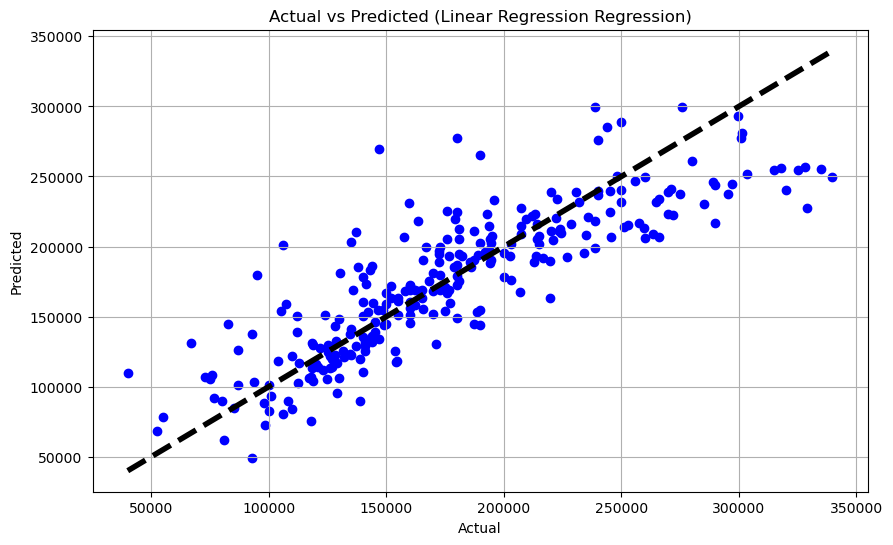

In [23]:
r01 , R01=  linearregression(X_train, X_test, y_train, y_test)

R^2: 0.714
RMSE: 32472.74


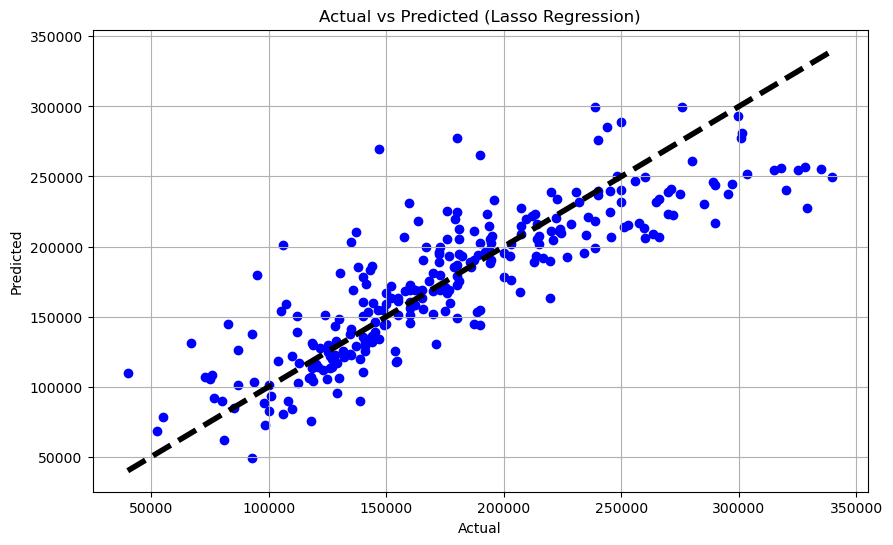

In [24]:
r02,R02= lasso(X_train, X_test, y_train, y_test)

R^2: 0.714
RMSE: 32473.08


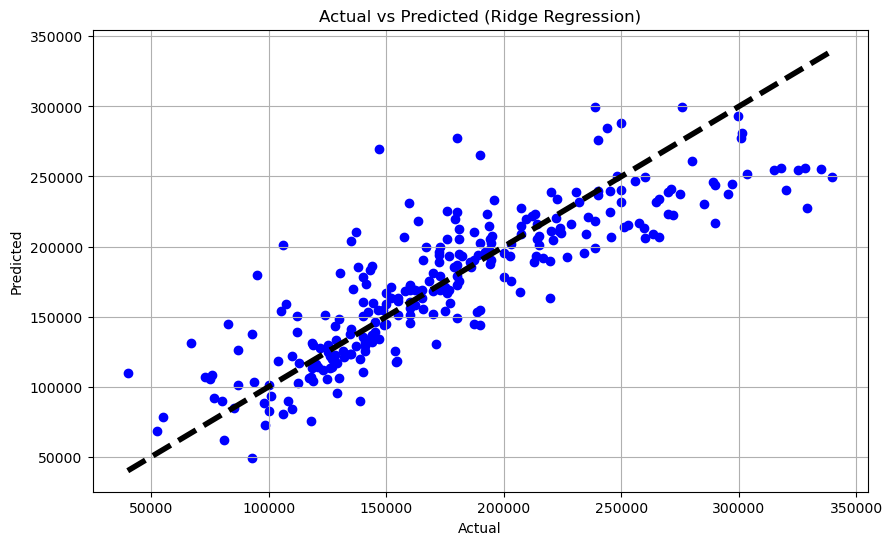

In [25]:
r03,R03= ridge(X_train, X_test, y_train, y_test)

In [26]:
data = [
    {"Model": "LinearRegression", "R2 Score": r01, "RMSE": R01},
    {"Model": "Lasso", "R2 Score": r02, "RMSE": R02},
    {"Model": "Ridge", "R2 Score": r02, "RMSE": R02}
]

models = pd.DataFrame(data)

models

,Model,R2 Score,RMSE
0,LinearRegression,0.714162,32472.721897
1,Lasso,0.714162,32472.740804
2,Ridge,0.714162,32472.740804


## lets do it with hyperparameter tuning

In [27]:
def perform_regression(X_train, X_test, y_train, y_test, model_name='linear', alpha=1.0):
    if model_name == 'linear':
        model = LinearRegression()
    elif model_name == 'lasso':
        model = Lasso()
    elif model_name == 'ridge':
        model = Ridge(alpha=alpha)
    else:
        raise ValueError("Invalid model name. Choose 'linear', 'lasso', or 'ridge'.")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted ({model_name.capitalize()} Regression)')
    plt.grid(True)
    plt.show()

    return model, r2, rmse

In [28]:
def perform_regression_with_cv(X_train, X_test, y_train, y_test, model_name='linear', alpha=1.0, cv=5):
    if model_name == 'linear':
        model = LinearRegression()
        params = {}
    elif model_name == 'lasso':
        model = Lasso()
        params = {'alpha': [0.1, 0.5, 1.0, 2.0]}
    elif model_name == 'ridge':
        model = Ridge()
        params = {'alpha': [0.1, 0.5, 1.0, 2.0]}
    else:
        raise ValueError("Invalid model name. Choose 'linear', 'lasso', or 'ridge'.")
    
    grid_search = GridSearchCV(model, params, cv=cv, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    y_pred=grid_search.predict(X_test)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted ({model_name.capitalize()} Regression)')
    plt.grid(True)
    plt.show()
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    return best_model, best_params

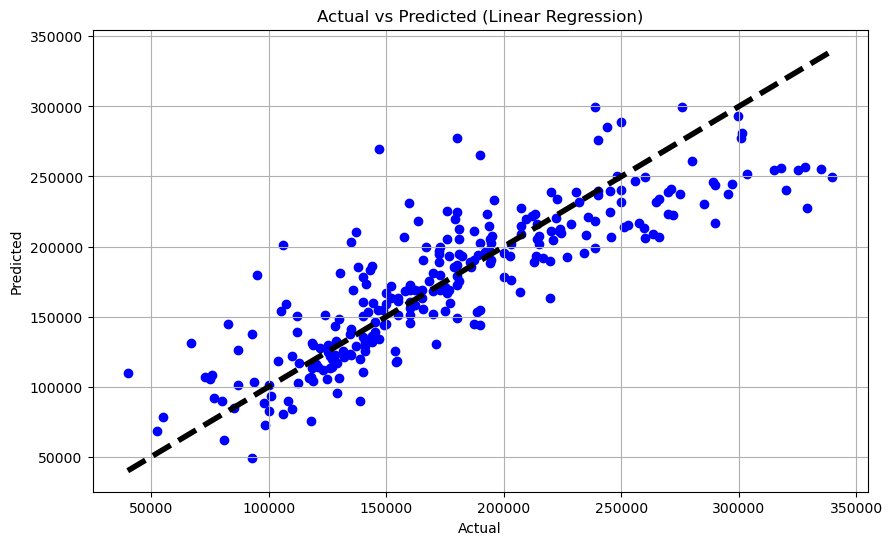

In [29]:
linear_model, linear_r2, linear_rmse = perform_regression(X_train, X_test, y_train, y_test, model_name='linear')

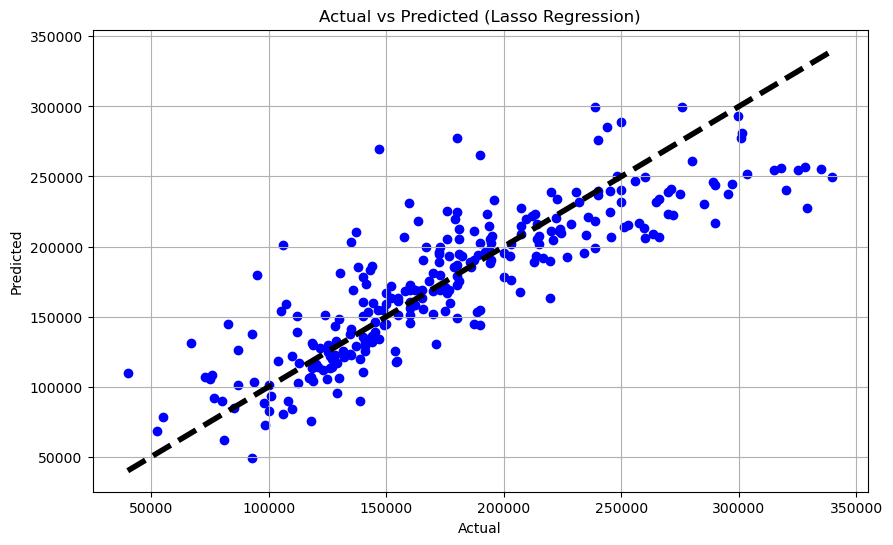

In [30]:
lasso_model, lasso_r2, lasso_rmse = perform_regression(X_train, X_test, y_train, y_test, model_name='lasso')

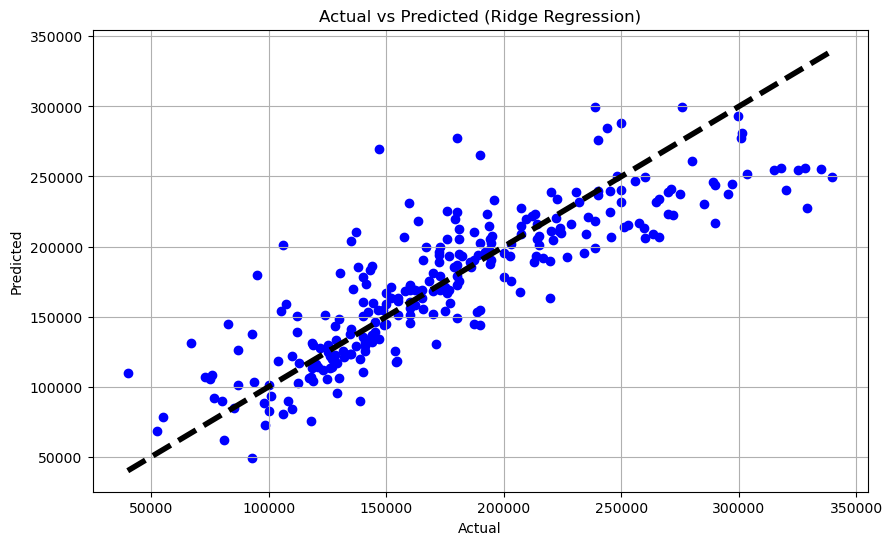

In [31]:
ridge_model, ridge_r2, ridge_rmse = perform_regression(X_train, X_test, y_train, y_test, model_name='ridge')

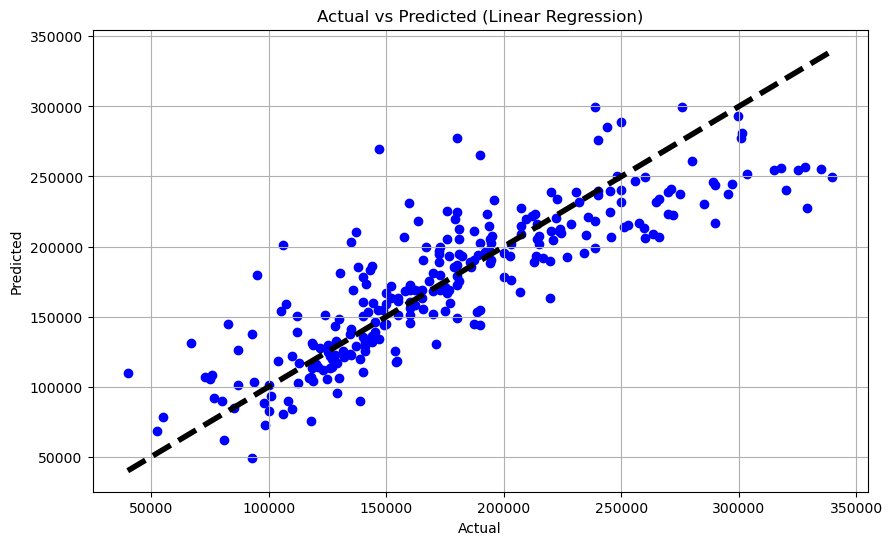

In [32]:
best_linear_model, best_linear_params = perform_regression_with_cv(X_train, X_test, y_train, y_test, model_name='linear')

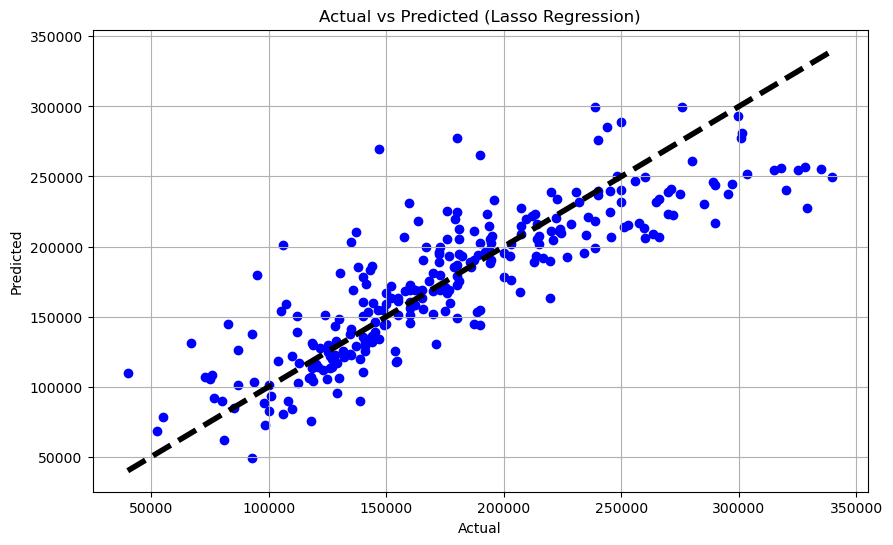

In [33]:
best_lasso_model, best_lasso_params = perform_regression_with_cv(X_train, X_test, y_train, y_test, model_name='lasso')

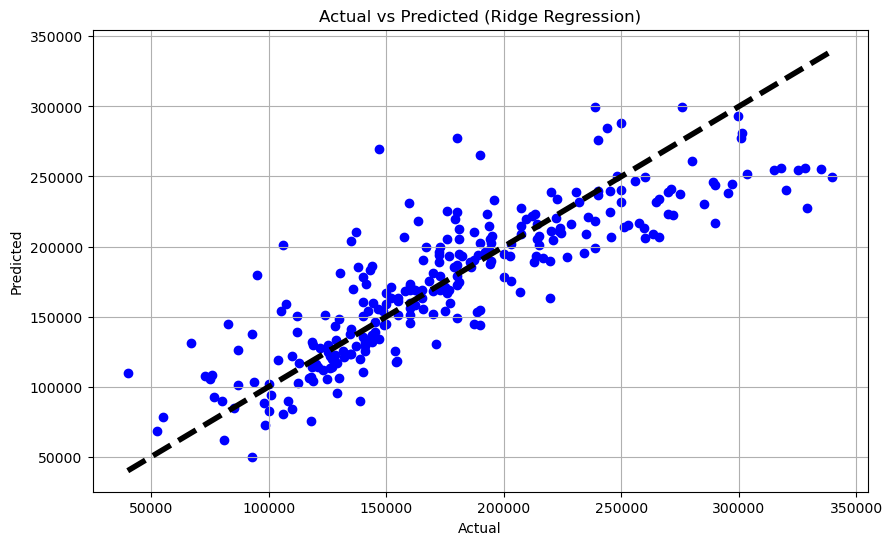

In [34]:
best_ridge_model, best_ridge_params = perform_regression_with_cv(X_train, X_test, y_train, y_test, model_name='ridge')

In [35]:
# pickle.dump(linearregression.lr,open('linear.pkl','wb'))

In [36]:
with open('best_linear_model.pkl', 'wb') as f:
    pickle.dump(best_linear_model, f)